<a href="https://colab.research.google.com/github/shajeeraza12/Data-Visualization/blob/main/DVHW1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

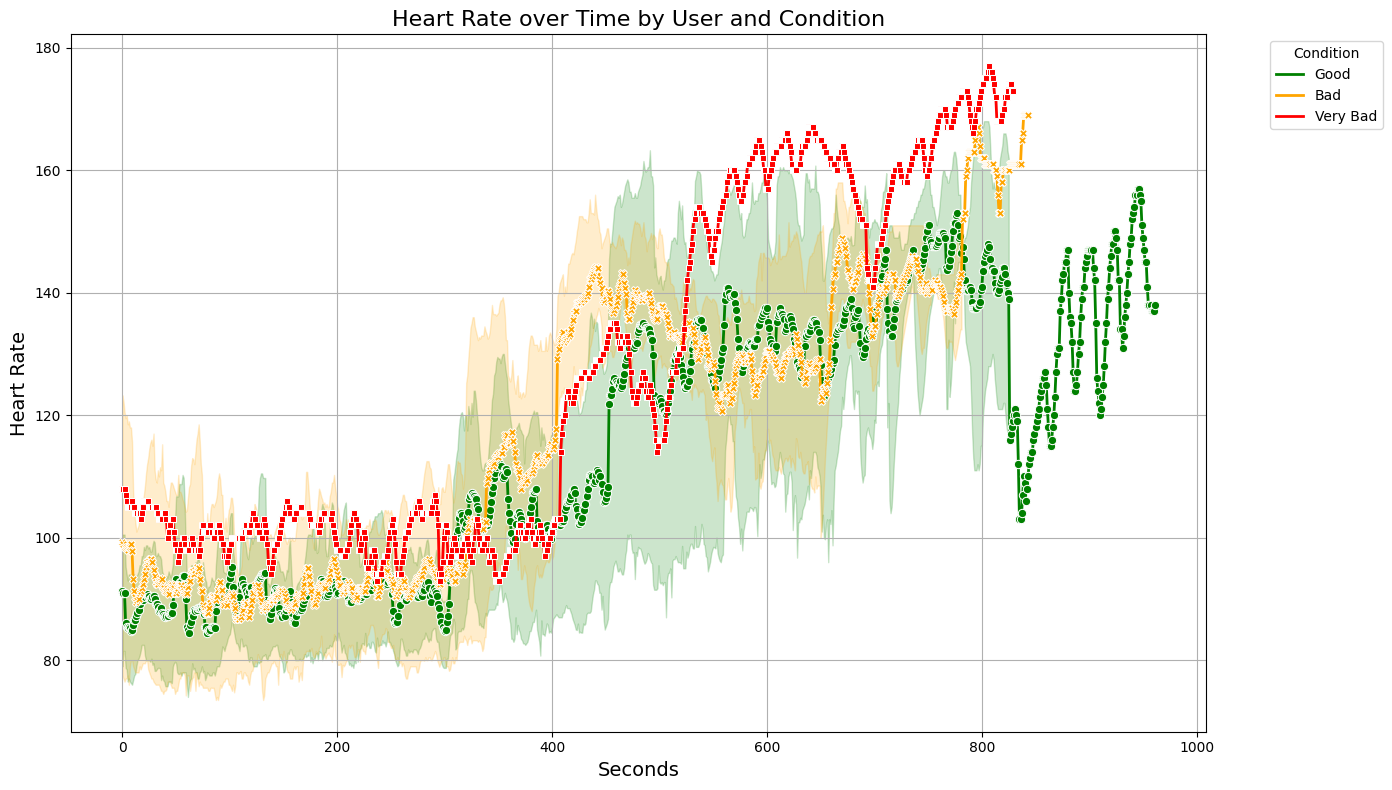

In [ ]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

file_pattern = "/content/User_*_*.csv"
files = glob.glob(file_pattern)

all_data = []

for file in files:
    filename = os.path.basename(file)
    user, condition = filename.replace('.csv', '').split('_')[1:]

    df = pd.read_csv(file)
    df['User'] = user
    df['Condition'] = condition
    all_data.append(df)

data = pd.concat(all_data, ignore_index=True)

condition_colors = {
    'good': 'green',
    'bad': 'orange',
    'verybad': 'red'
}

sns.set_palette([condition_colors['good'], condition_colors['bad'], condition_colors['verybad']])

plt.figure(figsize=(14, 8))

sns.lineplot(data=data, x='Second', y='HeartRate', hue='Condition', style='Condition', markers=True, dashes=False, lw=2)

plt.title('Heart Rate over Time by User and Condition', fontsize=16)
plt.xlabel('Seconds', fontsize=14)
plt.ylabel('Heart Rate', fontsize=14)

handles = [
    mlines.Line2D([], [], color=condition_colors['good'], lw=2, label='Good'),
    mlines.Line2D([], [], color=condition_colors['bad'], lw=2, label='Bad'),
    mlines.Line2D([], [], color=condition_colors['verybad'], lw=2, label='Very Bad')
]
plt.legend(handles=handles, title="Condition", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(True)
plt.tight_layout()

plt.savefig('/content/heart_rate_combined_plot.png')

plt.show()
